<a href="https://colab.research.google.com/github/shashank-github1/git-test/blob/master/MBE_in_gascap_reservoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be finding Initial oil and initial gas in place by using material balance equation in this gas-cap-drive reservoir where the following PVT data is given to us.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

We have imported the libraries that we need.

In [168]:
df = pd.read_excel('Book2.xlsx')
df

,Pressure psi,Np (MMSTB),Rp (scf/STB),Bo (RB/STB),Rs (scf/STB),Bg (RB/scf)
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


We have read the excel file containing the PVT parameters at different pressures.

In [0]:
boi = 1.2511
bgi = .00087
Rsi = 510

We have written the initial values of FVF of oil, FVF of gas and gas solubility at initial pressure from the table.

In [0]:
df['Eg'] = (boi/bgi) * (df['Bg (RB/scf)']-bgi)
df['Eo'] = (df['Bo (RB/STB)']- boi) + (( Rsi - df['Rs (scf/STB)']) * df['Bg (RB/scf)'])
df['F'] = (df['Np (MMSTB)']*1000000.0) * (df['Bo (RB/STB)'] + ((df['Rp (scf/STB)'] - df['Rs (scf/STB)']) * df['Bg (RB/scf)']))

Here, we have calculated the values of Eo (expansion of oi), Eg (expansion of gas cap) & F (underground withdrawal) by the use material balance equation modification as given by Havlena and Odeh (1963).

In [171]:
df.head()

,Pressure psi,Np (MMSTB),Rp (scf/STB),Bo (RB/STB),Rs (scf/STB),Bg (RB/scf),Eg,Eo,F
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.00
1,3150,3.295,1050,1.2353,477,0.00092,0.071902,0.01456,5807305.70
2,3000,5.903,1060,1.2222,450,0.00096,0.129424,0.02870,10671443.40
3,2850,8.852,1160,1.2122,425,0.00101,0.201326,0.04695,17301676.60
4,2700,11.503,1235,1.2022,401,0.00107,0.287609,0.06773,24093953.74


In [172]:
df['F/Eo'] = df['F']/df['Eo']
df['Eg/Eo'] = df['Eg']/df['Eo']
df.head()

,Pressure psi,Np (MMSTB),Rp (scf/STB),Bo (RB/STB),Rs (scf/STB),Bg (RB/scf),Eg,Eo,F,F/Eo,Eg/Eo
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.00,NaN,NaN
1,3150,3.295,1050,1.2353,477,0.00092,0.071902,0.01456,5807305.70,3.988534e+08,4.938345
2,3000,5.903,1060,1.2222,450,0.00096,0.129424,0.02870,10671443.40,3.718273e+08,4.509552
3,2850,8.852,1160,1.2122,425,0.00101,0.201326,0.04695,17301676.60,3.685128e+08,4.288103
4,2700,11.503,1235,1.2022,401,0.00107,0.287609,0.06773,24093953.74,3.557353e+08,4.246408


Here, since this is the case where both 'N' & 'm' are unknown, therefore we need to plot a graph between '(F/Eo) and (Eg/Eo) to get the slope and intercept. Hence we add the values of F/Eo & Eg/Eo to the table.

In [173]:
for column in ['F/Eo']:
  df[column] = df[column].replace(np.NaN,0)
for column in ['Eg/Eo']:
  df[column] = df[column].replace(np.NaN,0)
df.head()

,Pressure psi,Np (MMSTB),Rp (scf/STB),Bo (RB/STB),Rs (scf/STB),Bg (RB/scf),Eg,Eo,F,F/Eo,Eg/Eo
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.00,0.000000e+00,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,0.071902,0.01456,5807305.70,3.988534e+08,4.938345
2,3000,5.903,1060,1.2222,450,0.00096,0.129424,0.02870,10671443.40,3.718273e+08,4.509552
3,2850,8.852,1160,1.2122,425,0.00101,0.201326,0.04695,17301676.60,3.685128e+08,4.288103
4,2700,11.503,1235,1.2022,401,0.00107,0.287609,0.06773,24093953.74,3.557353e+08,4.246408


Replaced the null values with zero although there is no need to do this as we will plot considering 2nd row onwards.

In [0]:
from scipy import stats

In [0]:
X = df.loc[1:,'Eg/Eo']
Y = df.loc[1:,'F/Eo']

Here, We have assigned the X and Y axis of the plot with Eg/Eo and F/Eo respectively.

In [0]:
slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
  return slope * X + intercept

mymodel = list(map(myfunc, X))

We have performed linear regression by importing the 'stats' module from the 'scipy' library.

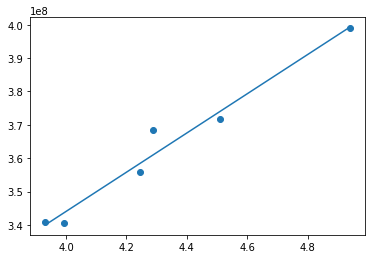

In [177]:
plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.show()

This is the plot and this is not very clear at depicting because of the difference in magnitude of X and Y axis values. Y axis values are larger than X axis.

In [178]:
Nm = slope
N = intercept
print(N)
print(Nm)

108702727.37219977
58830133.75844256


Hence, we obtain the intercept which depicts the initial stock tank barrel of oil and the slope from where we will be finding 'm'which will help us to calculate initial gas in place. Initial oil in place comes out to be 108.70 MMSTB.

In [179]:
m = Nm/N
print(m)

0.5412020027520312


This gives us the value of 'm'.

In [180]:
G = (Nm * boi)/ bgi
print(G)

84600437178.37642


Hence, we calculated the initial gas in place which comes out to be 84.6 MMMscf.